In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [27]:
df = pd.read_csv("adult.csv",1,",")
data = [df]
print (df.head())

   age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week         country  salary  
0          2174             0              40   United-States   <=50

In [28]:
salary_map={' <=50K':0,' >50K':1}
df['salary']=df['salary'].map(salary_map).astype(int)
    
print (df.head(10))

   age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   
5   37            Private  284582     Masters             14   
6   49            Private  160187         9th              5   
7   52   Self-emp-not-inc  209642     HS-grad              9   
8   31            Private   45781     Masters             14   
9   42            Private  159449   Bachelors             13   

           marital-status          occupation    relationship    race  \
0           Never-married        Adm-clerical   Not-in-family   White   
1      Married-civ-spouse     Exec-managerial         Husband   White   
2                Divorced   Handlers-cleaners   Not-in-family   White   
3  

In [4]:
# sex into integer
df['sex'] = df['sex'].map({' Male':1,' Female':0}).astype(int)

print (df.head(10))
print (("-"*40))
print (df.info())

   age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   
5   37            Private  284582     Masters             14   
6   49            Private  160187         9th              5   
7   52   Self-emp-not-inc  209642     HS-grad              9   
8   31            Private   45781     Masters             14   
9   42            Private  159449   Bachelors             13   

           marital-status          occupation    relationship    race  sex  \
0           Never-married        Adm-clerical   Not-in-family   White    1   
1      Married-civ-spouse     Exec-managerial         Husband   White    1   
2                Divorced   Handlers-cleaners   Not-in-family

In [5]:
# Menghitung Pemusatan data dengan describe()
df.describe()

,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,salary
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,0.669205,1077.648844,87.303830,40.437456,0.240810
std,13.640433,1.055500e+05,2.572720,0.470506,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,1.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,1.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,1.000000,99999.000000,4356.000000,99.000000,1.000000


In [6]:
df['country'] = df['country'].replace(' ?',np.nan)
df['workclass'] = df['workclass'].replace(' ?',np.nan)
df['occupation'] = df['occupation'].replace(' ?',np.nan)

df.dropna(how='any',inplace=True)

In [7]:
df.describe()

,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,salary
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,0.675685,1092.007858,88.372489,40.931238,0.248922
std,13.134665,1.056530e+05,2.549995,0.468126,7406.346497,404.298370,11.979984,0.432396
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.784250e+05,10.000000,1.000000,0.000000,0.000000,40.000000,0.000000
75%,47.000000,2.376285e+05,13.000000,1.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,1.000000,99999.000000,4356.000000,99.000000,1.000000


In [8]:
df.corr()

,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,salary
age,1.000000,-0.076511,0.043526,0.081993,0.080154,0.060165,0.101599,0.241998
fnlwgt,-0.076511,1.000000,-0.044992,0.025362,0.000422,-0.009750,-0.022886,-0.008957
education-num,0.043526,-0.044992,1.000000,0.006157,0.124416,0.079646,0.152522,0.335286
sex,0.081993,0.025362,0.006157,1.000000,0.048814,0.047011,0.231268,0.216699
capital-gain,0.080154,0.000422,0.124416,0.048814,1.000000,-0.032229,0.080432,0.221196
capital-loss,0.060165,-0.009750,0.079646,0.047011,-0.032229,1.000000,0.052417,0.150053
hours-per-week,0.101599,-0.022886,0.152522,0.231268,0.080432,0.052417,1.000000,0.229480
salary,0.241998,-0.008957,0.335286,0.216699,0.221196,0.150053,0.229480,1.000000


In [7]:
def plot_correlation(df, size=15):
    corr= df.corr()
    fig, ax =plt.subplots(figsize=(size,size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)),corr.columns)
    plt.yticks(range(len(corr.columns)),corr.columns)
    plt.show()

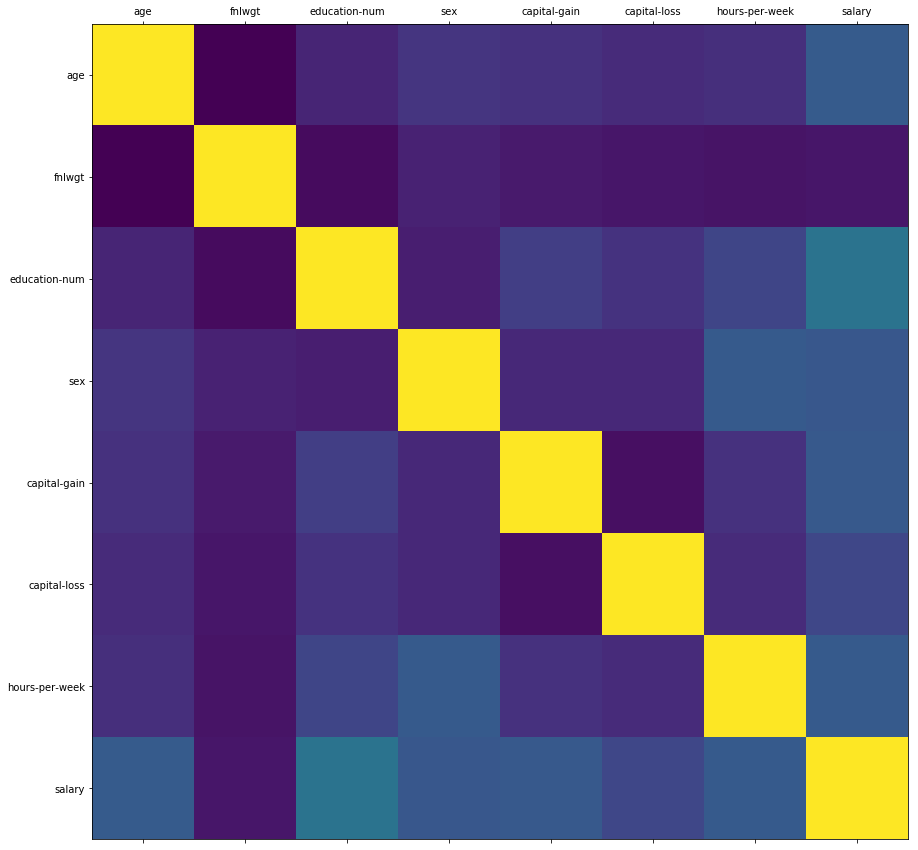

In [8]:
plot_correlation(df)

In [9]:
print (df[['country','salary']].groupby(['country']).mean())

                               salary
country                              
 ?                           0.250429
 Cambodia                    0.368421
 Canada                      0.322314
 China                       0.266667
 Columbia                    0.033898
 Cuba                        0.263158
 Dominican-Republic          0.028571
 Ecuador                     0.142857
 El-Salvador                 0.084906
 England                     0.333333
 France                      0.413793
 Germany                     0.321168
 Greece                      0.275862
 Guatemala                   0.046875
 Haiti                       0.090909
 Holand-Netherlands          0.000000
 Honduras                    0.076923
 Hong                        0.300000
 Hungary                     0.230769
 India                       0.400000
 Iran                        0.418605
 Ireland                     0.208333
 Italy                       0.342466
 Jamaica                     0.123457
 Japan      

In [9]:
print (df.shape)
df['country'] = df['country'].replace(' ?',np.nan)
df['workclass'] = df['workclass'].replace(' ?',np.nan)
df['occupation'] = df['occupation'].replace(' ?',np.nan)

df.dropna(how='any',inplace=True)

print (df.shape)
print (df.head(10))

(30162, 15)
(30162, 15)
   age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   
5   37            Private  284582     Masters             14   
6   49            Private  160187         9th              5   
7   52   Self-emp-not-inc  209642     HS-grad              9   
8   31            Private   45781     Masters             14   
9   42            Private  159449   Bachelors             13   

           marital-status          occupation    relationship    race  sex  \
0           Never-married        Adm-clerical   Not-in-family   White    1   
1      Married-civ-spouse     Exec-managerial         Husband   White    1   
2                Divorced   Handlers-

In [10]:
for dataset in data:
    dataset.loc[dataset['country'] != ' United-States', 'country'] = 'Non-US'
    dataset.loc[dataset['country'] == ' United-States', 'country'] = 'US'

In [12]:
df.head(20)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,US,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,US,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,US,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,US,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,Non-US,0
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,0,0,0,40,US,0
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,0,0,0,16,Non-US,0
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,45,US,1
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,0,14084,0,50,US,1
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,5178,0,40,US,1


In [11]:
df['country'] = df['country'].map({'US':1,'Non-US':0}).astype(int)
df.head(20)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,1,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,1,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,1,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,1,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,0,0
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,0,0,0,40,1,0
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,0,0,0,16,0,0
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,45,1,1
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,0,14084,0,50,1,1
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,5178,0,40,1,1


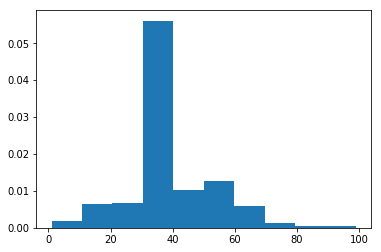

In [12]:
x= df['hours-per-week']
plt.hist(x,bins=None,density=True,normed=None,histtype='bar')
plt.show()

In [20]:
df[['relationship','salary']].groupby(['relationship']).mean()

,salary
relationship,
Husband,0.455669
Not-in-family,0.106523
Other-relative,0.039370
Own-child,0.014330
Unmarried,0.066314
Wife,0.493599


In [29]:
df[['marital-status','salary']].groupby(['marital-status']).mean()

,salary
marital-status,
Divorced,0.104209
Married-AF-spouse,0.434783
Married-civ-spouse,0.446848
Married-spouse-absent,0.081340
Never-married,0.045961
Separated,0.064390
Widowed,0.085599


In [31]:
df['marital-status'] = df['marital-status'].replace([' Divorced',' Married-spouse-absent',' Never-married',' Separated',' Widowed'],'Single')
df['marital-status'] = df['marital-status'].replace([' Married-AF-spouse',' Married-civ-spouse'],'Couple')

df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Single,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Couple,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Single,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Couple,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Couple,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
5,37,Private,284582,Masters,14,Couple,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
6,49,Private,160187,9th,5,Single,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,0
7,52,Self-emp-not-inc,209642,HS-grad,9,Couple,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
8,31,Private,45781,Masters,14,Single,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,1
9,42,Private,159449,Bachelors,13,Couple,Exec-managerial,Husband,White,Male,5178,0,40,United-States,1


In [32]:
df[['marital-status','salary']].groupby(['marital-status']).mean()

,salary
marital-status,
Couple,0.446830
Single,0.064856


In [33]:
df[['marital-status','relationship','salary']].groupby(['marital-status','relationship']).mean()

salary
marital-status relationship             
Couple          Husband         0.448571
                Not-in-family   0.235294
                Other-relative  0.144000
                Own-child       0.177083
                Wife            0.475128
Single          Not-in-family   0.102799
                Other-relative  0.022196
                Own-child       0.010056
                Unmarried       0.063262

In [20]:
df[['marital-status','relationship','salary']].groupby(['relationship','marital-status']).mean()

salary
relationship    marital-status          
 Husband        Couple          0.455669
 Not-in-family  Couple          0.285714
                Single          0.106198
 Other-relative Couple          0.142857
                Single          0.023377
 Own-child      Couple          0.178571
                Single          0.011182
 Unmarried      Single          0.066314
 Wife           Couple          0.493599

In [39]:
pd.crosstab(df['marital-status'], df['relationship'], margins = True)

relationship,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife,All
marital-status,,,,,,,
Couple,13193,17,125,96,0,1568,14999
Single,0,8288,856,4972,3446,0,17562
All,13193,8305,981,5068,3446,1568,32561


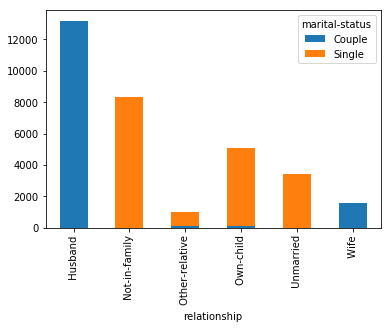

In [41]:
# Membuat Stack Column Chart dari two-way table
temp = pd.crosstab(df['relationship'], df['marital-status'])
temp.plot.bar(stacked=True)

In [43]:
marital_tab = pd.crosstab(df['relationship'], df['marital-status'], margins = True)
marital_tab

marital-status,Couple,Single,All
relationship,,,
Husband,13193,0,13193
Not-in-family,17,8288,8305
Other-relative,125,856,981
Own-child,96,4972,5068
Unmarried,0,3446,3446
Wife,1568,0,1568
All,14999,17562,32561


In [47]:
# membuat matrix observed
marital_tab.columns = ["Couple","Single","row_totals"]

marital_tab.index = ["Husband","Not-in-family","Other-relative","Own-child", "Unmarried", "Wife", "col_totals"]

observed = marital_tab.iloc[0:6,0:2]   # Get table without totals for later use
observed

,Couple,Single
Husband,13193,0
Not-in-family,17,8288
Other-relative,125,856
Own-child,96,4972
Unmarried,0,3446
Wife,1568,0


In [50]:
# Membuat matrix expected
expected =  np.outer(marital_tab["row_totals"][0:6],
                     marital_tab.loc["col_totals"][0:2]) / 32561

expected = pd.DataFrame(expected)

expected.columns = ["Couple","Single"]
expected.index = ["Husband","Not-in-family","Other-relative","Own-child", "Unmarried", "Wife"]

expected

,Couple,Single
Husband,6077.264427,7115.735573
Not-in-family,3825.640951,4479.359049
Other-relative,451.890882,529.109118
Own-child,2334.539234,2733.460766
Unmarried,1587.376125,1858.623875
Wife,722.288382,845.711618


In [51]:
# Hitung chi-square statistik
chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()

print(chi_squared_stat)

31674.631752605295


In [53]:
import scipy.stats as stats

In [54]:
# Hitung critical value
crit = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = 1)   # *

print("Critical value")
print(crit)

p_value = 1 - stats.chi2.cdf(x=chi_squared_stat,  # Find the p-value
                             df=1)
print("P value")
print(p_value)

Critical value
3.841458820694124
P value
0.0


In [55]:
# Cara lain: menggunakan package stats
stats.chi2_contingency(observed= observed)

(31674.63175260529, 0.0, 5, array([[6077.26442677, 7115.73557323],
        [3825.64095083, 4479.35904917],
        [ 451.89088173,  529.10911827],
        [2334.53923405, 2733.46076595],
        [1587.37612481, 1858.62387519],
        [ 722.28838181,  845.71161819]]))

In [56]:
pd.crosstab(df['marital-status'], df['salary'], margins = True)

salary,0,1,All
marital-status,,,
Couple,8297,6702,14999
Single,16423,1139,17562
All,24720,7841,32561


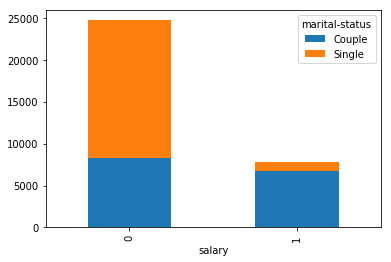

In [57]:
temp2 = pd.crosstab(df['salary'], df['marital-status'])
temp2.plot.bar(stacked=True)

In [58]:
m_tab = pd.crosstab(df['marital-status'], df['salary'], margins = True)
m_tab

salary,0,1,All
marital-status,,,
Couple,8297,6702,14999
Single,16423,1139,17562
All,24720,7841,32561


In [59]:
# membuat matrix observed
m_tab.columns = ["Couple","Single","row_totals"]

m_tab.index = ["0","1","col_totals"]

observed = m_tab.iloc[0:2,0:2]   # Get table without totals for later use
observed

,Couple,Single
0,8297,6702
1,16423,1139


In [65]:
# Membuat matrix expected
expected =  np.outer(m_tab["row_totals"][0:2],
                     m_tab.loc["col_totals"][0:2]) / 32561

expected = pd.DataFrame(expected)

expected.columns = ["Couple","Single"]
expected.index = ["0","1"]

expected

,Couple,Single
0,11387.097448,3611.902552
1,13332.902552,4229.097448


In [66]:
# Hitung chi-square statistik
chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()

print(chi_squared_stat)

6456.265111407234


In [62]:
# Hitung critical value
crit = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = 1)   # *

print("Critical value")
print(crit)

p_value = 1 - stats.chi2.cdf(x=chi_squared_stat,  # Find the p-value
                             df=1)
print("P value")
print(p_value)

Critical value
3.841458820694124
P value
0.0


In [64]:
# Cara lain: menggunakan package stats
stats.chi2_contingency(observed= observed)

(6454.175940147994, 0.0, 1, array([[11387.09744787,  3611.90255213],
        [13332.90255213,  4229.09744787]]))

ValueError: scatter requires x column to be numeric

In [21]:
df['marital-status'] = df['marital-status'].map({'Couple':0,'Single':1})
   
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,1,Adm-clerical,Not-in-family,White,1,2174,0,40,1,0
1,50,Self-emp-not-inc,83311,Bachelors,13,0,Exec-managerial,Husband,White,1,0,0,13,1,0
2,38,Private,215646,HS-grad,9,1,Handlers-cleaners,Not-in-family,White,1,0,0,40,1,0
3,53,Private,234721,11th,7,0,Handlers-cleaners,Husband,Black,1,0,0,40,1,0
4,28,Private,338409,Bachelors,13,0,Prof-specialty,Wife,Black,0,0,0,40,0,0
5,37,Private,284582,Masters,14,0,Exec-managerial,Wife,White,0,0,0,40,1,0
6,49,Private,160187,9th,5,1,Other-service,Not-in-family,Black,0,0,0,16,0,0
7,52,Self-emp-not-inc,209642,HS-grad,9,0,Exec-managerial,Husband,White,1,0,0,45,1,1
8,31,Private,45781,Masters,14,1,Prof-specialty,Not-in-family,White,0,14084,0,50,1,1
9,42,Private,159449,Bachelors,13,0,Exec-managerial,Husband,White,1,5178,0,40,1,1


In [69]:
rel_map = {' Unmarried':0,' Wife':1,' Husband':2,' Not-in-family':3,' Own-child':4,' Other-relative':5}

df['relationship'] = df['relationship'].map(rel_map)
    
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Single,Adm-clerical,3,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Couple,Exec-managerial,2,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Single,Handlers-cleaners,3,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Couple,Handlers-cleaners,2,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Couple,Prof-specialty,1,Black,Female,0,0,40,Cuba,0
5,37,Private,284582,Masters,14,Couple,Exec-managerial,1,White,Female,0,0,40,United-States,0
6,49,Private,160187,9th,5,Single,Other-service,3,Black,Female,0,0,16,Jamaica,0
7,52,Self-emp-not-inc,209642,HS-grad,9,Couple,Exec-managerial,2,White,Male,0,0,45,United-States,1
8,31,Private,45781,Masters,14,Single,Prof-specialty,3,White,Female,14084,0,50,United-States,1
9,42,Private,159449,Bachelors,13,Couple,Exec-managerial,2,White,Male,5178,0,40,United-States,1


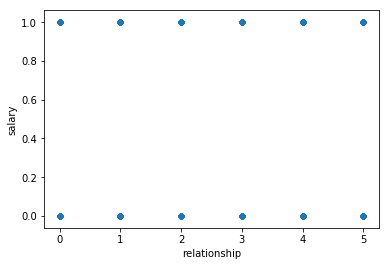

In [70]:
# Scatter plot antara variabel 'preTestScore' dan 'postTestScore'
df.plot.scatter(x='relationship', y='salary')

In [23]:
df[['race','salary']].groupby('race').mean()

,salary
race,
Amer-Indian-Eskimo,0.118881
Asian-Pac-Islander,0.277095
Black,0.129925
Other,0.090909
White,0.263718


In [24]:
race_map={' White':0,' Amer-Indian-Eskimo':1,' Asian-Pac-Islander':2,' Black':3,' Other':4}
df['race']= df['race'].map(race_map)
    
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,1,Adm-clerical,3,0,1,2174,0,40,1,0
1,50,Self-emp-not-inc,83311,Bachelors,13,0,Exec-managerial,2,0,1,0,0,13,1,0
2,38,Private,215646,HS-grad,9,1,Handlers-cleaners,3,0,1,0,0,40,1,0
3,53,Private,234721,11th,7,0,Handlers-cleaners,2,3,1,0,0,40,1,0
4,28,Private,338409,Bachelors,13,0,Prof-specialty,1,3,0,0,0,40,0,0
5,37,Private,284582,Masters,14,0,Exec-managerial,1,0,0,0,0,40,1,0
6,49,Private,160187,9th,5,1,Other-service,3,3,0,0,0,16,0,0
7,52,Self-emp-not-inc,209642,HS-grad,9,0,Exec-managerial,2,0,1,0,0,45,1,1
8,31,Private,45781,Masters,14,1,Prof-specialty,3,0,0,14084,0,50,1,1
9,42,Private,159449,Bachelors,13,0,Exec-managerial,2,0,1,5178,0,40,1,1


In [25]:
df[['occupation','salary']].groupby(['occupation']).mean()

,salary
occupation,
Adm-clerical,0.133835
Armed-Forces,0.111111
Craft-repair,0.225310
Exec-managerial,0.485220
Farming-fishing,0.116279
Handlers-cleaners,0.061481
Machine-op-inspct,0.124619
Other-service,0.041096
Priv-house-serv,0.006993


In [26]:
df[['workclass','salary']].groupby(['workclass']).mean()


,salary
workclass,
Federal-gov,0.387063
Local-gov,0.294630
Private,0.218792
Self-emp-inc,0.558659
Self-emp-not-inc,0.285714
State-gov,0.268960
Without-pay,0.000000


In [27]:
def f(x):
    if x['workclass'] == ' Federal-gov' or x['workclass']== ' Local-gov' or x['workclass']==' State-gov': return 'govt'
    elif x['workclass'] == ' Private':return 'private'
    elif x['workclass'] == ' Self-emp-inc' or x['workclass'] == ' Self-emp-not-inc': return 'self_employed'
    else: return 'without_pay'
    
    
df['employment_type']=df.apply(f, axis=1)

df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary,employment_type
0,39,State-gov,77516,Bachelors,13,1,Adm-clerical,3,0,1,2174,0,40,1,0,govt
1,50,Self-emp-not-inc,83311,Bachelors,13,0,Exec-managerial,2,0,1,0,0,13,1,0,self_employed
2,38,Private,215646,HS-grad,9,1,Handlers-cleaners,3,0,1,0,0,40,1,0,private
3,53,Private,234721,11th,7,0,Handlers-cleaners,2,3,1,0,0,40,1,0,private
4,28,Private,338409,Bachelors,13,0,Prof-specialty,1,3,0,0,0,40,0,0,private
5,37,Private,284582,Masters,14,0,Exec-managerial,1,0,0,0,0,40,1,0,private
6,49,Private,160187,9th,5,1,Other-service,3,3,0,0,0,16,0,0,private
7,52,Self-emp-not-inc,209642,HS-grad,9,0,Exec-managerial,2,0,1,0,0,45,1,1,self_employed
8,31,Private,45781,Masters,14,1,Prof-specialty,3,0,0,14084,0,50,1,1,private
9,42,Private,159449,Bachelors,13,0,Exec-managerial,2,0,1,5178,0,40,1,1,private


In [28]:
df[['employment_type','salary']].groupby(['employment_type']).mean()

,salary
employment_type,
govt,0.307298
private,0.218792
self_employed,0.367758
without_pay,0.000000


In [29]:
employment_map = {'govt':0,'private':1,'self_employed':2,'without_pay':3}

df['employment_type'] = df['employment_type'].map(employment_map)
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary,employment_type
0,39,State-gov,77516,Bachelors,13,1,Adm-clerical,3,0,1,2174,0,40,1,0,0
1,50,Self-emp-not-inc,83311,Bachelors,13,0,Exec-managerial,2,0,1,0,0,13,1,0,2
2,38,Private,215646,HS-grad,9,1,Handlers-cleaners,3,0,1,0,0,40,1,0,1
3,53,Private,234721,11th,7,0,Handlers-cleaners,2,3,1,0,0,40,1,0,1
4,28,Private,338409,Bachelors,13,0,Prof-specialty,1,3,0,0,0,40,0,0,1
5,37,Private,284582,Masters,14,0,Exec-managerial,1,0,0,0,0,40,1,0,1
6,49,Private,160187,9th,5,1,Other-service,3,3,0,0,0,16,0,0,1
7,52,Self-emp-not-inc,209642,HS-grad,9,0,Exec-managerial,2,0,1,0,0,45,1,1,2
8,31,Private,45781,Masters,14,1,Prof-specialty,3,0,0,14084,0,50,1,1,1
9,42,Private,159449,Bachelors,13,0,Exec-managerial,2,0,1,5178,0,40,1,1,1


In [30]:
df[['education','salary']].groupby(['education']).mean()

,salary
education,
10th,0.071951
11th,0.056298
12th,0.076923
1st-4th,0.039735
5th-6th,0.041667
7th-8th,0.062837
9th,0.054945
Assoc-acdm,0.253968
Assoc-voc,0.263198


In [31]:
df.drop(labels=['workclass','education','occupation'],axis=1,inplace=True)
df.head(10)

,age,fnlwgt,education-num,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary,employment_type
0,39,77516,13,1,3,0,1,2174,0,40,1,0,0
1,50,83311,13,0,2,0,1,0,0,13,1,0,2
2,38,215646,9,1,3,0,1,0,0,40,1,0,1
3,53,234721,7,0,2,3,1,0,0,40,1,0,1
4,28,338409,13,0,1,3,0,0,0,40,0,0,1
5,37,284582,14,0,1,0,0,0,0,40,1,0,1
6,49,160187,5,1,3,3,0,0,0,16,0,0,1
7,52,209642,9,0,2,0,1,0,0,45,1,1,2
8,31,45781,14,1,3,0,0,14084,0,50,1,1,1
9,42,159449,13,0,2,0,1,5178,0,40,1,1,1


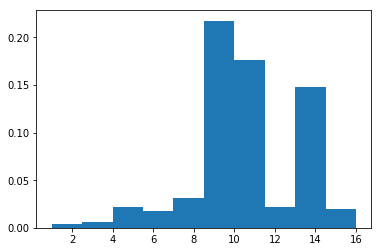

In [32]:
x= df['education-num']
plt.hist(x,bins=None,density=True,normed=None,histtype='bar')
plt.show()

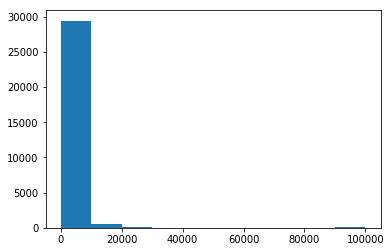

In [33]:
x=df['capital-gain']
plt.hist(x,bins=None,normed=None)
plt.show()

In [34]:
df.loc[(df['capital-gain'] > 0),'capital-gain'] = 1
df.loc[(df['capital-gain'] == 0 ,'capital-gain')]= 0

In [35]:
df.head(25)

,age,fnlwgt,education-num,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary,employment_type
0,39,77516,13,1,3,0,1,1,0,40,1,0,0
1,50,83311,13,0,2,0,1,0,0,13,1,0,2
2,38,215646,9,1,3,0,1,0,0,40,1,0,1
3,53,234721,7,0,2,3,1,0,0,40,1,0,1
4,28,338409,13,0,1,3,0,0,0,40,0,0,1
5,37,284582,14,0,1,0,0,0,0,40,1,0,1
6,49,160187,5,1,3,3,0,0,0,16,0,0,1
7,52,209642,9,0,2,0,1,0,0,45,1,1,2
8,31,45781,14,1,3,0,0,1,0,50,1,1,1
9,42,159449,13,0,2,0,1,1,0,40,1,1,1


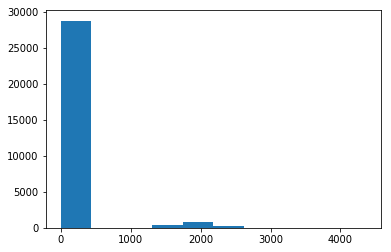

In [36]:
x=df['capital-loss']
plt.hist(x,bins=None)
plt.show()

In [37]:
df.loc[(df['capital-loss'] > 0),'capital-loss'] = 1
df.loc[(df['capital-loss'] == 0 ,'capital-loss')]= 0

df.head(10)

,age,fnlwgt,education-num,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary,employment_type
0,39,77516,13,1,3,0,1,1,0,40,1,0,0
1,50,83311,13,0,2,0,1,0,0,13,1,0,2
2,38,215646,9,1,3,0,1,0,0,40,1,0,1
3,53,234721,7,0,2,3,1,0,0,40,1,0,1
4,28,338409,13,0,1,3,0,0,0,40,0,0,1
5,37,284582,14,0,1,0,0,0,0,40,1,0,1
6,49,160187,5,1,3,3,0,0,0,16,0,0,1
7,52,209642,9,0,2,0,1,0,0,45,1,1,2
8,31,45781,14,1,3,0,0,1,0,50,1,1,1
9,42,159449,13,0,2,0,1,1,0,40,1,1,1


In [38]:
df['age'].count()

30162

In [43]:
from sklearn.model_selection import train_test_split

X= df.drop(['salary'],axis=1)
y=df['salary']
split_size=0.3

#Creation of Train and Test dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=split_size,random_state=22)

#Creation of Train and validation dataset
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.2,random_state=5)

In [44]:
print ("Train dataset: {0}{1}".format(X_train.shape, y_train.shape))
print ("Validation dataset: {0}{1}".format(X_val.shape, y_val.shape))
print ("Test dataset: {0}{1}".format(X_test.shape, y_test.shape))

Train dataset: (16890, 12)(16890,)
Validation dataset: (4223, 12)(4223,)
Test dataset: (9049, 12)(9049,)


In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [46]:
models = []
names = ['LR','Random Forest','Neural Network','GaussianNB','DecisionTreeClassifier','SVM',]

models.append((LogisticRegression()))
models.append((RandomForestClassifier(n_estimators=100)))
models.append((MLPClassifier()))
models.append((GaussianNB()))
models.append((DecisionTreeClassifier()))
models.append((SVC()))

In [47]:
print (models)

[LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False), RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False), MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_s

In [48]:
from sklearn import model_selection
from sklearn.metrics import accuracy_score


In [49]:
kfold = model_selection.KFold(n_splits=5,random_state=7)

for i in range(0,len(models)):    
    cv_result = model_selection.cross_val_score(models[i],X_train,y_train,cv=kfold,scoring='accuracy')
    score=models[i].fit(X_train,y_train)
    prediction = models[i].predict(X_val)
    acc_score = accuracy_score(y_val,prediction)     
    print ('-'*40)
    print ('{0}: {1}'.format(names[i],acc_score))

----------------------------------------
LR: 0.7492304049254085
----------------------------------------
Random Forest: 0.823585129055174
----------------------------------------
Neural Network: 0.7492304049254085
----------------------------------------
GaussianNB: 0.7712526639829506
----------------------------------------
DecisionTreeClassifier: 0.780251006393559
----------------------------------------
SVM: 0.7508879943168364


In [ ]:
#Let's proceed further with Random Forest algorithm as it showed good accuracy

In [50]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [51]:
randomForest = RandomForestClassifier(n_estimators=100)
randomForest.fit(X_train,y_train)
prediction = randomForest.predict(X_test)